# MACHINE LEARNING PROJECT- EMPLOYEE TURNOVER ANALYTICS

#### IMPORTING REQUIRED LIBRARIES:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### IMPORTING DATASET

In [2]:
df= pd.read_excel('DATA.xlsx')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### 1.Perform data quality check by checking for missing values if any. 

##### CHECKING MISSING VALUES:

In [7]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
#DROPPING NULL VALUES:
df.dropna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
df.duplicated(keep= 'first').sum()

3008

In [10]:
df.drop_duplicates(inplace= True)

In [11]:
df.shape

(11991, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


#### 2.EXPLORATORY DATA ANALYSIS: 

In [13]:
#MONTHLY HOURS

In [14]:
df["average_montly_hours"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [15]:
s= len(df["average_montly_hours"].unique())
s

215

<AxesSubplot: xlabel='average_montly_hours', ylabel='Count'>

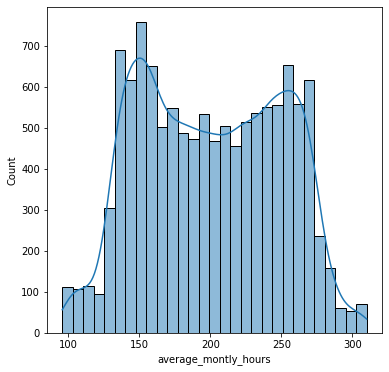

In [16]:
plt.figure(figsize=(6,6))
sns.histplot(data= df, x=df["average_montly_hours"], kde= True)

In [17]:
#NUMBER OF PROJECTS:
df["number_project"].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

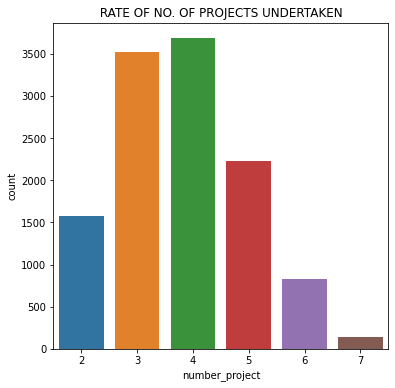

In [18]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x= "number_project")
plt.title(" RATE OF NO. OF PROJECTS UNDERTAKEN ")
plt.show()


In [19]:
#PROMOTION MADE IN LAST 5 YEAR:
df['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [20]:
labels = df["promotion_last_5years"].value_counts().index.tolist()
labels

[0, 1]

In [21]:
labels = ["promoted" if i == 1 else "not promoted" for i in labels]
labels

['not promoted', 'promoted']

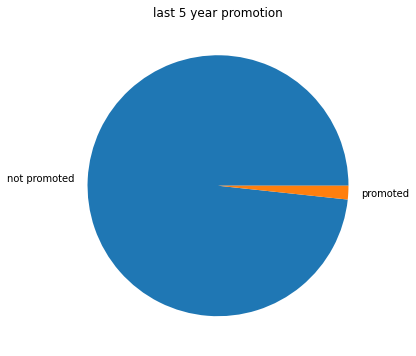

In [22]:
plt.figure(figsize=(6,6))
plt.pie(x=df["promotion_last_5years"].value_counts(), labels= labels)
plt.title("last 5 year promotion")
plt.show()

##### WORK ACCIDENTS:

In [23]:
df["Work_accident"].value_counts()

0    10141
1     1850
Name: Work_accident, dtype: int64

In [24]:
labels= df["Work_accident"].value_counts().index.tolist()

In [25]:
labels

[0, 1]

In [26]:
labels = ["work accident" if i == 1 else "no work accident " for i in labels]
labels

['no work accident ', 'work accident']

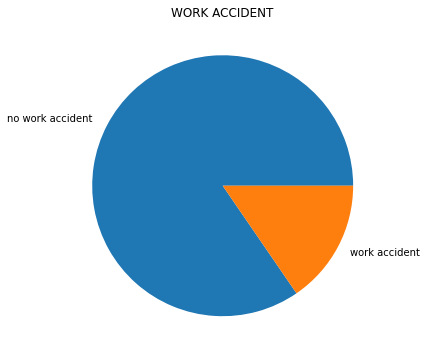

In [27]:
plt.figure(figsize=(6,6))
plt.pie(x=df["Work_accident"].value_counts(), labels= labels)
plt.title("WORK ACCIDENT")
plt.show()

##### TIME SPENT IN COMPANY

In [28]:
df["time_spend_company"].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [29]:
labels= df["time_spend_company"].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

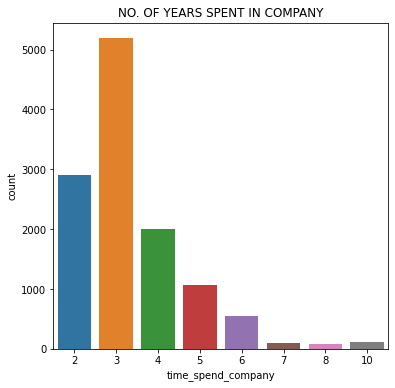

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x= "time_spend_company", data= df)
plt.title("NO. OF YEARS SPENT IN COMPANY")
plt.show()

##### DEPARTMENT COMPARISION:

In [31]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [32]:
df["sales"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: sales, dtype: int64

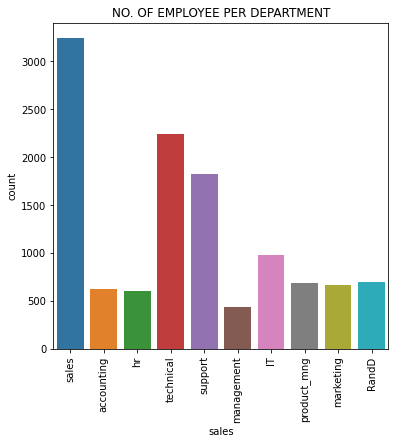

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x= "sales", data= df)
plt.xticks(rotation=90)
plt.title("NO. OF EMPLOYEE PER DEPARTMENT")
plt.show()

In [34]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [35]:
df["salary"].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [36]:
labels= df["salary"].value_counts().index.tolist()
labels

['low', 'medium', 'high']

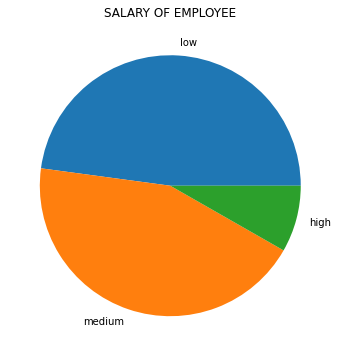

In [37]:
plt.figure(figsize=(6,6))
plt.pie(x=df["salary"].value_counts(), labels= labels)
plt.title("SALARY OF EMPLOYEE")
plt.show()

#### DATA PREPROCESSING

In [38]:
df.rename(columns={"sales":"department", "salary":"salary_level"}, inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### CATEGORICAL ENCODING

In [39]:
categorical_cols = ["department","salary_level"]


In [40]:
encoded_cols = pd.get_dummies(df[categorical_cols], prefix= "cat")
encoded_cols.head()

,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [41]:
df= df.join(encoded_cols)

In [42]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_level,...,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [43]:
df.drop(["department","salary_level"], inplace= True, axis ="columns")

In [44]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting',
       'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng',
       'cat_sales', 'cat_support', 'cat_technical', 'cat_high', 'cat_low',
       'cat_medium'],
      dtype='object')

##### MIN-MAX SCALING

In [45]:
df["average_montly_hours"].min()

96

In [46]:
df["average_montly_hours"].max()

310

##### SPLIT DATA INTO TRAIN AND TEST:

In [47]:
X= df.drop("left", axis= 1)
y= df["left"]

In [48]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [49]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8)

In [52]:
X_train.shape

(9592, 20)

In [53]:
X_test.shape

(2399, 20)

#### TRAIN MODEL
##### LOGICAL REGRESSION MODEL

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
logReg= LogisticRegression(max_iter=2000)


In [56]:
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [57]:
logReg_predictions= logReg.predict(X_test)

In [58]:
accuracy_score(y_test, logReg_predictions)

0.8249270529387245

In [59]:
print(classification_report(y_test,logReg_predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1979
           1       0.50      0.18      0.27       420

    accuracy                           0.82      2399
   macro avg       0.67      0.57      0.58      2399
weighted avg       0.79      0.82      0.79      2399



In [60]:
cm= confusion_matrix(y_test, logReg_predictions)
cm

array([[1902,   77],
       [ 343,   77]])

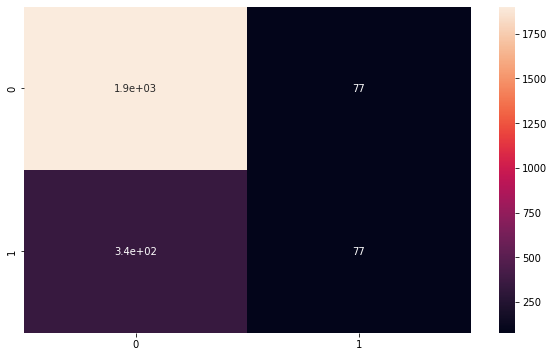

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot= True)
plt.show()

#### RANDOM FOREST

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
ranForest= RandomForestClassifier(n_estimators=100)

In [64]:
ranForest.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
ranForest_predictions= ranForest.predict(X_test)

In [66]:
accuracy_score(y_test,ranForest_predictions)

0.9766569403918299

In [67]:
print(classification_report(y_test, ranForest_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1979
           1       0.98      0.89      0.93       420

    accuracy                           0.98      2399
   macro avg       0.98      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [68]:
cm= confusion_matrix(y_test, ranForest_predictions)
cm

array([[1971,    8],
       [  48,  372]])

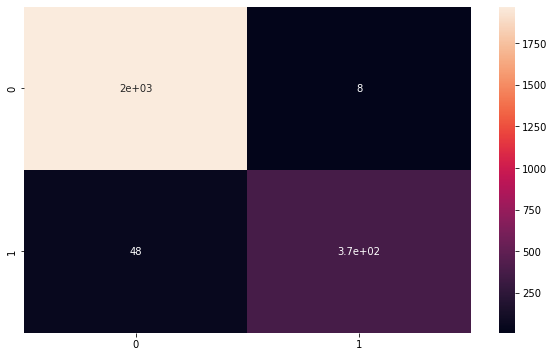

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot= True)
plt.show()

#### RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
ranForest= RandomForestClassifier(n_estimators=100)

In [72]:
ranForest.fit(X_train,y_train)

RandomForestClassifier()